In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import textwrap

In [14]:
rcParams['font.family'] = 'Proxima Nova'
text_color = '#323232'
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.labelcolor'] = text_color
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = "white"

colors = {
    'orange':'#f4731f',
    'turquoise': '#41B6E6',
    'purple': '#512D6D',
    'blue': '#006298',
    'l_blue': '#99D6EA',
    'd_blue': '#01426A',
    'green': '#78BE20'
}

In [3]:
data = pd.read_csv('../data/q8_df.csv')

In [4]:
data.drop(index = 13, inplace = True)

In [5]:
data['ord'] = [0, 3, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]
data.set_index('ord', inplace = True)
data.sort_index(inplace = True)
data.loc[2, 'group'] = 'Has personally experienced recently'
data.loc[3, 'group'] = 'Has not personally experienced recently'

In [6]:
data

,quest,group,prop_sup
ord,,,
0,total,total,78
2,q1_all_exp,Has personally experienced recently,86
3,q1_all_exp,Has not personally experienced recently,76
5,age_cat,18-24,73
6,age_cat,25-34,79
7,age_cat,35-44,89
8,age_cat,45-54,80
9,age_cat,55-64,77
10,age_cat,65+,70


In [7]:
subtitles = {1: "Childcare Challenges", 4: "Age", 11: "Institution"}

In [8]:
len(data) + len(subtitles)

16

In [9]:
list(range(1, 16))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [10]:
if 1 in data.index:
    print('true')
else:
    print('false')

false


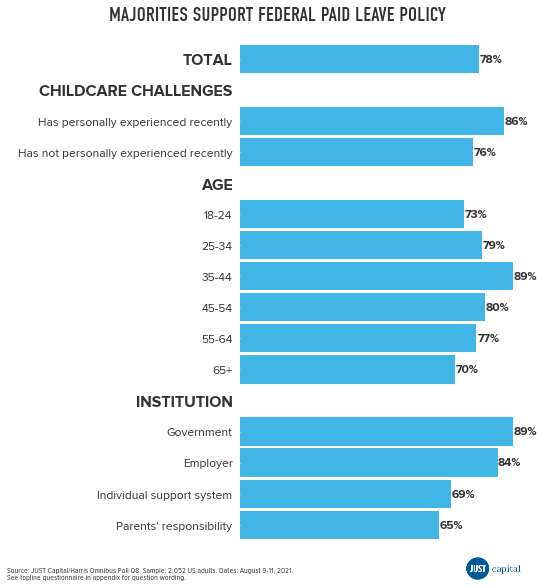

In [25]:
fig, ax = plt.subplots(nrows = 16, figsize=(7.5,8), sharex = True)
fontsize_ylab = 12
fontsize_datalab = 12
nudge_datalab = 4
fontsize_title = 20

title = "Majorities support federal paid leave policy"
fig.suptitle(title.upper(), ha='center', va='center', fontsize=fontsize_title, fontproperties = 'DIN Condensed')

ax[0].set_xticks([])
ax[0].set_yticks([0])
ax[0].set_yticklabels(labels = ['Total'.upper()], fontsize = fontsize_ylab+4, weight = 'bold', color = text_color)
ax[0].barh(0, data.loc[0]['prop_sup'], color = '#41B6E6')
ax[0].annotate(f"{data.loc[0]['prop_sup']}%",
               (data.loc[0]['prop_sup']+nudge_datalab, 0),
               ha = 'center', va = 'center', fontsize = fontsize_datalab, #color = 'white', 
               weight = 'bold')

for r in range(1,16):
    if r in data.index:
        x = data.loc[r]['prop_sup']
        y = 0
        ax[r].set_yticks([y])
        ax[r].barh(y, x, color = '#41B6E6')
        ax[r].set_yticklabels(labels=[data.loc[r]['group']], fontsize=fontsize_ylab, color = text_color)
        ax[r].annotate(f"{x}%",
                       (x+nudge_datalab, y),
                       ha = 'center', va = 'center', 
                       fontsize = fontsize_datalab,
                       #color = 'white', 
                       weight = 'bold')
    else:
        ax[r].set_yticks([0])
        ax[r].set_yticklabels(labels = [subtitles[r].upper()], fontsize = fontsize_ylab+4, weight = 'bold', 
                              color = text_color)
        ax[r].barh(0,0)



sns.despine(bottom=True, left = True)
fig.tight_layout(rect = [0,0.05,1,1], h_pad = 0)

# create caption
captext = '''Source: JUST Capital/Harris Omnibus Poll Q8. Sample: 2,052 US adults. Dates: August 9-11, 2021. 
See topline questionnaire in appendix for question wording.'''
fig.text(x = 0, y = 0, 
         ha = 'left', va = 'bottom',
         s = captext, fontdict={'family':'Proxima Nova Condensed', 'fontsize':8})

# insert logo image
logo = plt.imread('../assets/Just Capital_Logo_RGB_500px_SSf.png')
newax = fig.add_axes([0.85,0,0.1,0.1], anchor='SE', zorder=1)
newax.imshow(logo)
newax.axis('off')

# save image file
#plt.show();
fig.savefig('../images/fig13.png', facecolor = "white", dpi=300, bbox_inches='tight');